# Econometrics & Linear Regression Analysis

In this project, I’m using econometrics to understand how financial data behaves and interacts over time. Econometrics combines mathematical tools with statistical inference to uncover relationships between financial variables, forming the backbone of modern quantitative finance.

To lay the foundation, I begin with **linear regression analysis**, the most widely used technique in finance and the basis for more advanced econometric models. Here, I outline the essential steps required to implement a regression model — steps that will generalize to more complex analyses throughout this repository.  
This section assumes basic undergraduate-level statistics.

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.rcParams["figure.figsize"] = (12, 9)

## 1. Preparing a Linear Regression Project

To give this analysis a practical context, I assume the role of an equity analyst at an asset management firm. The task is to investigate the recent increase in **Coca-Cola’s (NYSE: KO)** stock price and determine whether there is still room for future growth. I approach the problem through three structured steps.

---

### 1.1 Identify Potential Factors Influencing KO’s Stock Price

My first step is to research and identify possible drivers of KO’s recent price movement. These factors may include:

- Company fundamentals (e.g., revenue growth, sales trends)
- Broader stock market performance
- Sector-specific dynamics
- Macroeconomic indicators

The goal is to form hypotheses about which variables might be influencing KO’s price. Once I have a list of potential factors, I gather the corresponding historical data for analysis.

---

### 1.2 Quantify the Relationship Using Linear Regression

With data collected, I move on to quantifying how each factor affects KO’s stock price. Linear regression allows me to measure not just *whether* a factor matters but also *how strongly* KO’s price responds when that factor changes.

I build a regression model, analyze its coefficients and statistical significance, and refine the model until I achieve meaningful and reliable results. This step ensures that the relationships are supported by data rather than assumptions.

---

### 1.3 Forecast Future Price Movements

After developing a validated regression model, I extend the analysis into forecasting. By creating scenario-based simulations (e.g., 0.5%, 1%, or 2% increases in revenue), I estimate how KO’s stock price might respond under different conditions.

These projections help evaluate whether the recent upward trend has the potential to continue and provide insight into what future changes may drive further price appreciation.


## **2. Endogenous Variable vs. Exogenous Variable**

After researching the factors that influence **Coca-Cola (KO)**, I identified three variables that appear to have the strongest impact on KO’s stock price:

- KO’s revenue  
- PepsiCo’s stock price  
- The Dow Jones Industrial Average (DOW 30)

Using these factors, I construct a linear regression model to predict **KO’s next-day closing excess return**.

---

## 2.1 Converting Prices to Excess Returns

According to financial theory, **excess return** is typically more informative than raw price levels. Excess return is defined as:

**Excess Return = Actual Return – Risk-Free Rate**  
(Where the risk-free rate is often proxied using Treasury Bill rates.)

To ensure comparability and consistency across variables, I convert every variable into **quarterly returns or ratios**, giving me:

> **KO’s stock excess return (%)**  
> **KO’s quarterly sales growth (%)**  
> **DOW 30 Index excess return (%)**  
> **Pepsi’s stock excess return (%)**

All variables are expressed as *quarterly ratios* so the regression model works with aligned time intervals.

---

## 2.2 Endogenous vs. Exogenous Variables

Before fitting the regression model, I classify each variable as **endogenous** or **exogenous**.

- An **endogenous variable** (dependent variable) is determined by the model.  
- An **exogenous variable** (independent variable) comes from outside the model and is treated as given.

In this analysis:

- **Endogenous variable:**  
  - KO’s excess return  
- **Exogenous variables:**  
  - KO’s quarterly sales growth  
  - Pepsi’s excess return  
  - DOW 30 excess return  

These exogenous variables help explain how KO’s excess return behaves when the broader market, Pepsi, or KO’s underlying fundamentals change.



## **3. Check Relationship between Endogenous Variable and Exogenous Variables**

After defining the endogenous and exogenous variables for the regression model, the next step is to visualize their relationships. Graphical analysis is a valuable diagnostic tool because it helps reveal model structure, detect issues in the data, and guide decisions about which variables or observations should be included or excluded.

To do this, I use **scatter plots** — simple two-dimensional graphs where one variable is placed on the x-axis and the other on the y-axis. These plots help reveal how two variables interact.

---

## 3.1 Checking for Linearity

A fundamental assumption of linear regression is that the endogenous variable has a **linear relationship** with each exogenous variable. Scatter plots make this easy to verify.

If the plotted points cluster around an imaginary straight line, the linearity assumption likely holds. If not, the model may require transformation, restructuring, or reconsideration of that variable.

---

## 3.2 Checking for Independence

Scatter plots also help determine whether an exogenous variable is **independent** of the endogenous variable.

If the visual trend resembles a horizontal or vertical line, then changes in one variable do not meaningfully affect the other. In this case, the exogenous variable provides no explanatory power and should be removed from the regression model.

---

## 3.3 Detecting Extreme Observations

Scatter plots are effective for spotting unusual data points:

- **Outliers:**  
  Points that do not follow the general pattern of the data.  

- **Leverage points:**  
  Points with extreme values in one or more exogenous variables.

Both types may influence the regression results. To assess their impact, I typically estimate the model twice — once including them and once without — and compare the outcomes. This helps determine whether the model is robust or overly influenced by these extreme observations.


**Figure 1: Scatter Plot**—**KO Stock Excess Return vs. Dow 30 Index Excess Return**

In [2]:
# Download the dataset
data_set = pd.read_csv("fin_data_set.csv")

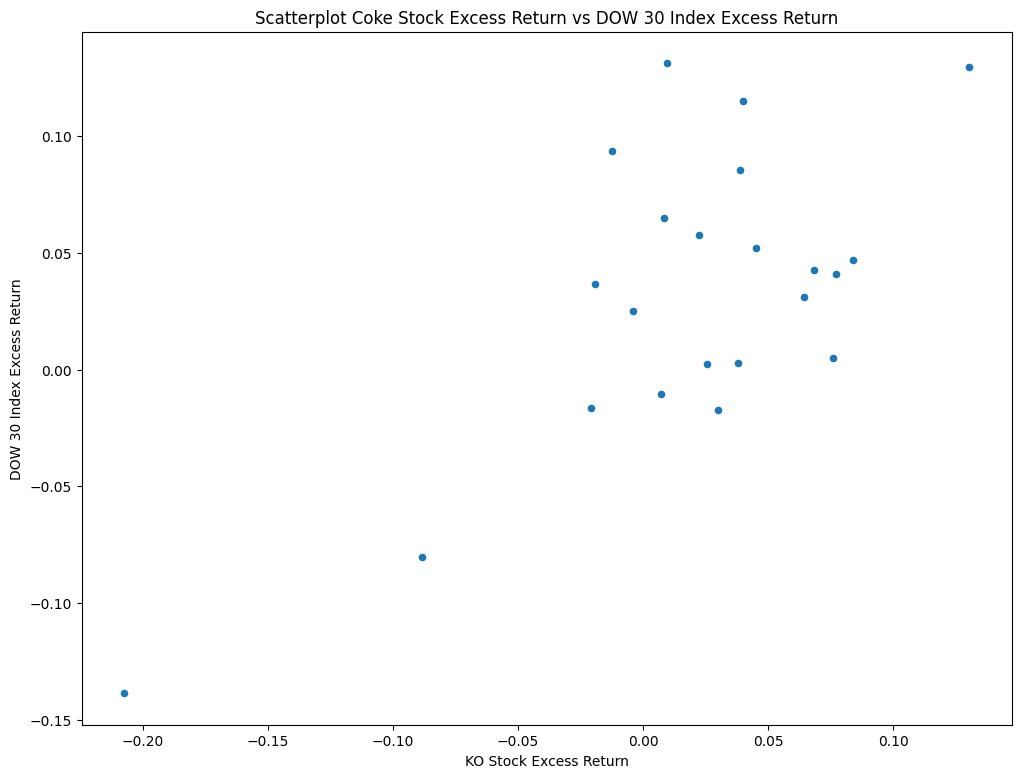

In [3]:
# Create scatter plot
scatt = data_set.plot.scatter(
    x="Coke_Q_EX_R",
    y="Dow_Q_EX_R",
    title="Scatterplot Coke Stock Excess Return vs DOW 30 Index Excess Return",
)
scatt.set(xlabel="KO Stock Excess Return", ylabel="DOW 30 Index Excess Return")
plt.show()

The scatter plot in *Figure 1* shows that **KO’s excess return** and the **Dow 30 Index excess return** generally move in the same direction. The points form an upward trend from the lower-left to the upper-right, indicating a positive linear relationship. Although two extreme observations appear in the plot, both still align with the overall trend, which suggests they may not distort the linear pattern.

To further verify the strength and direction of this relationship, I also rely on the **Pearson Correlation** coefficient. This metric ranges from **–1 to 1**:

- Values **greater than 0** indicate the variables tend to move in the same direction.  
- Values **less than 0** indicate movement in opposite directions.  
- A value of **1** represents a perfectly positive linear relationship.  
- A value of **–1** represents a perfectly negative linear relationship.

In combination with the scatter plot, the Pearson Correlation helps confirm whether a linear model is appropriate for these variables.


**Figure 2: Histogram, Correlation, and Scatter Plot Graph Matrix For Independent Variables and Dependent Variable**


In [4]:
# Function to calculate correlation coefficient between two arrays


def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

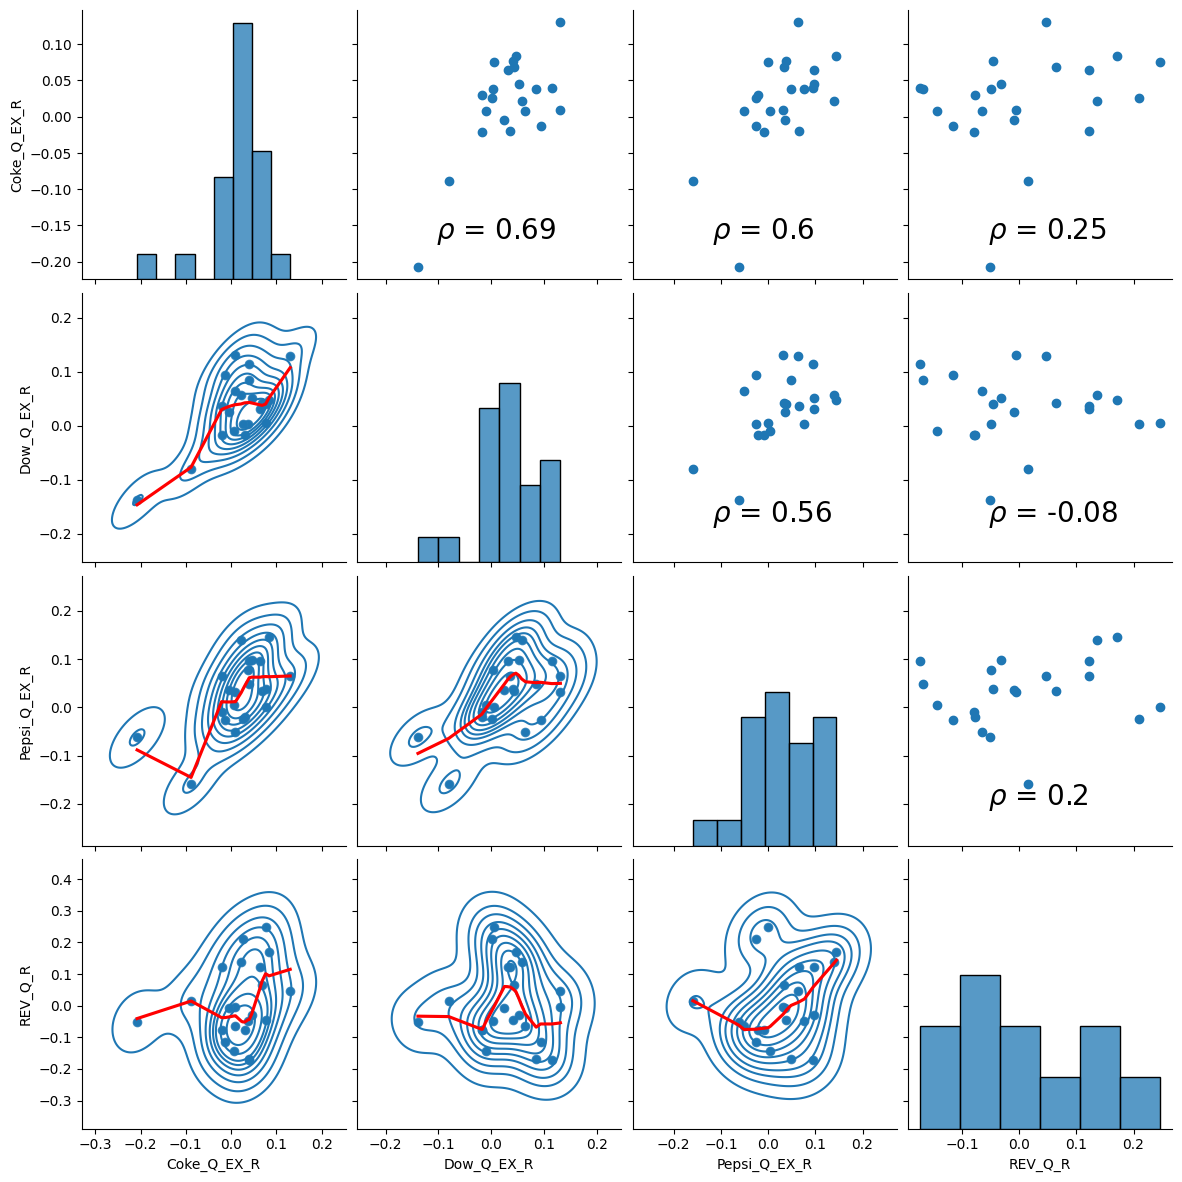

In [5]:
# Create the default pairplot
grid = sns.pairplot(
    data_set, vars=["Coke_Q_EX_R", "Dow_Q_EX_R", "Pepsi_Q_EX_R", "REV_Q_R"], height=3
)

# Map a scatter plot and Pearson correlation coefficient to the upper triangle
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)

# Map a histogram to the diagonal
# grid = grid.map_diag(plt.hist)

# Map a density plot and regression line to the lower triangle
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

> Data Period: 2016Q2 – 2021Q3 <br>
> Data Source: Yahoo Finance and Coca Cola's website <br>
> *Coke_Q_EX_R*: *KO* Quarterly Stock Excess Return <br>
> *Dow_Q_EX_R*: *DOW 30* Index Quarterly Excess Return <br>
> *Pepsi_Q_EX_R*: Pepsi Quarterly Stock Excess Return <br>
> *REV_Q_R*: *KO* Quarterly Revenue change % 


*Figure 2* summarizes the relationships among all variables used in the KO excess return analysis. The matrix is divided into three key components:

- **Lower-left triangle:** scatter plots for every two-way variable combination.  
- **Diagonal:** histograms showing the distribution of each variable.  
- **Upper-right triangle:** Pearson correlation values for each pair of variables.

---

The scatter plots comparing **KO’s excess return** with both the **Dow 30 excess return** and **Pepsi’s excess return** show clear positive linear relationships. The points form an oval-shaped cloud, and the fitted red line slopes upward, reinforcing that these variables are strong candidates for predicting KO’s return.

The scatter plot between **KO’s excess return** and **KO’s revenue growth**, however, shows a much weaker pattern. The points do not form a clear shape, and the fitted line is neither straight nor strongly upward-sloping, suggesting a weaker relationship.

---

The correlation values in the upper-right portion of the matrix confirm what the scatter plots show:

- **Dow excess return** and **Pepsi excess return** both have solid positive correlations with KO’s excess return.  
- **KO’s revenue growth**, on the other hand, shows a noticeably smaller correlation.

Together, these visual and statistical diagnostics indicate that the Dow and Pepsi variables are strong predictors, while KO’s own revenue growth may contribute less explanatory power to the regression model.


## **4. Estimate the Regression Model**

With the exploratory analysis complete, I begin constructing the regression model using **Ordinary Least Squares (OLS)** linear regression. OLS is one of the most widely used methods in econometrics for estimating the relationship between a dependent variable and one or more independent variables.

There are two main types of OLS models:

- **Simple OLS:** one exogenous variable and one endogenous variable  
- **Multiple OLS:** more than one exogenous variable and one endogenous variable  

Because this analysis includes **three** exogenous variables, I use a **multiple OLS linear regression**.

---


The regression model is defined as:

$$ \text{KO excess return} = b_0 + b_1 \text{Dow excess return} + b_2 \text{Pepsi excess return} + b_3 \text{KO revenue growth} $$


Here:
$$ ( b_0 ) = intercept  $$
$$ ( b_1, b_2, b_3 ) = \text{parameters (also called coefficients)} $$

Using OLS, I estimate the values of these parameters based on the dataset. Once computed, these parameter values are referred to as **estimates**, and they quantify how each exogenous variable influences KO’s excess return.


**Figure 3: Linear Regression Result for KO Excess Return Model**


In [6]:
# Linear regression result
result = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R", data=data_set
).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     9.150
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           0.000677
Time:                        18:39:41   Log-Likelihood:                 38.570
No. Observations:                  22   AIC:                            -69.14
Df Residuals:                      18   BIC:                            -64.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0080      0.011     -0.716      0.483      -0.032       0.015
Dow_Q_EX_R       0.6197      0.195      3.173      0.005       0.209       1.030
Pepsi_Q_EX_R     0.2187      0.179      1.221      0.238      -0.158       0.595
REV_Q_R          0.1435      0.088      1.632      0.120      -0.041       0.328
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.411
Skew:                          -0.564   Prob(JB):                        0.494
Kurtosis:                       2.481   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Parameters with 6 significant digits
result.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.008017,0.011189,-0.716476,0.482890,-0.031524,0.015490
Dow_Q_EX_R,0.619723,0.195287,3.173393,0.005261,0.209440,1.030006
Pepsi_Q_EX_R,0.218664,0.179107,1.220854,0.237893,-0.157627,0.594955
REV_Q_R,0.143481,0.087912,1.632093,0.120031,-0.041216,0.328178


Figure 3 shows the estimated results from the multiple OLS regression model. Each coefficient indicates how much **KO’s excess return** is expected to change when one of the explanatory variables changes, holding all other variables constant.

For example, the estimated coefficient for the **Dow excess return** is:

$$
0.619723
$$

This means:

- If the Dow’s excess return increases by 0.01 (1%),
- Then KO’s excess return is expected to increase by:

$$
0.01 \times 0.619723 = 0.00619723
$$

In percentage terms, that corresponds to a **0.619723% increase** in KO’s excess return.

Each remaining coefficient in the model is interpreted the same way — as the marginal effect of that variable on KO’s excess return.


## **5. Review the Model**

Now that the model has been estimated, the next step is to assess how well it performs. There are several methods to evaluate the **fitness** and **reliability** of a regression model.

I begin by examining the performance of each **exogenous variable** individually, and then evaluate how well the **overall model** explains movements in KO’s excess return. This two-step approach helps determine both the usefulness of each predictor and the strength of the model as a whole.


### **5.1 Performance of Each Exogenous Variable**

In the coefficient section of the regression output, the *Pr(>|t|)* column reports the p-values for each variable. A p-value indicates how strongly an exogenous variable helps explain movement in the endogenous variable. Lower p-values imply stronger explanatory power. In most applied work, a threshold of 0.05 is used to determine statistical significance.

In our results, only the Dow excess return is statistically significant (p-value = 0.00526 < 0.05). This naturally raises the question: should we remove the other two variables from the model? Before doing that, there are at least two important considerations.

1. **Linearity between KO’s excess return and KO’s revenue growth**  
   The scatter plot suggests a weak linear relationship between these two variables. However, that does not necessarily mean KO’s revenue growth has no value. It may simply be nonlinear. One approach is to transform KO’s revenue growth—using something like a square root or logarithm—and then re-examine the scatter plot to see whether the relationship becomes clearer.

2. **Correlation among exogenous variables**  
   The correlation between Dow excess returns and Pepsi excess returns is 0.56, which indicates a moderate positive relationship. When exogenous variables are correlated, the one with the stronger connection to the dependent variable often absorbs most of the explanatory power. This can cause the other correlated variable to appear statistically insignificant, even if it still carries meaningful information.

These points highlight why decisions about variable selection are not always straightforward. The relationships among variables and the way they are transformed or structured significantly influence the model’s results. I’ll explore these ideas further in the following sections.


### **5.2 $R^2$ and Adjusted $R^2$**

Next, I evaluate the overall fit of the model. One of the most common metrics for this is the coefficient of determination, $R^2$. This value measures how much of the variation in the endogenous variable can be explained by the combined variation of all exogenous variables. The value ranges from 0 to 1. An $R^2$ of 1 means the model perfectly explains the behavior of KO’s excess return—given the values of the predictors, the model would reproduce the dependent variable exactly. In general, the higher the $R^2$, the better the model fits.

In this case, the model’s $R^2$ is 0.604, meaning that changes in the Dow excess return, Pepsi excess return, and KO revenue growth together explain about 60% of the movement in KO’s excess return.

If a manager views 0.604 as inadequate, the next step might be to improve the model. A common approach is to add new exogenous variables, which typically increases $R^2$. However, this introduces the risk of **overfitting**—a situation where the model fits the sample data extremely well but performs poorly when applied to new data.

This is why the **adjusted $R^2$** is often used. While adding more variables will never decrease $R^2$, it does increase model complexity. The adjusted $R^2$ penalizes unnecessary complexity and only increases when a new variable improves the model more than the penalty applied for adding it. Like $R^2$, the adjusted version ranges from 0 to 1, but it is always lower.

For this model, the adjusted $R^2$ is 0.538. On its own, it is difficult to decide whether this value is good or bad. In practice, researchers build multiple versions of a regression model and compare their adjusted $R^2$ values to identify the best structure. Model building is almost always an iterative process, and the first attempt is rarely the optimal one.


## **6. Outliers and Influence**

Earlier, I reviewed how each exogenous variable performed and how well the overall model fit the data. Now, I shift the focus to the influence of individual data points in the sample used to estimate the regression.

When I examined the scatter plots earlier, I identified the presence of extreme observations—outliers and leverage points. These points do not always affect the regression results, but some can have a significant impact on the estimated coefficients.

The visual examples that follow illustrate how a single extreme data point can change the regression outcome. In each example, the red dot represents the extreme point. The black line shows the regression line calculated without that point, while the red line shows the regression line when the point is included. This comparison highlights whether the extreme value is influential or relatively harmless in the context of the model.


**Figure 4: The Impact of an Outlier on the Regression Model Result**


In [12]:
# Generate 30 random points
np.random.seed(42)
n = 30
x = np.random.uniform(0, 5, n)
y = 1 + 3 * x + np.random.normal(0, 1, n)

# Add outlier at (2.5, 17)
x_with_out = np.append(x, 2.5)
y_with_out = np.append(y, 17)

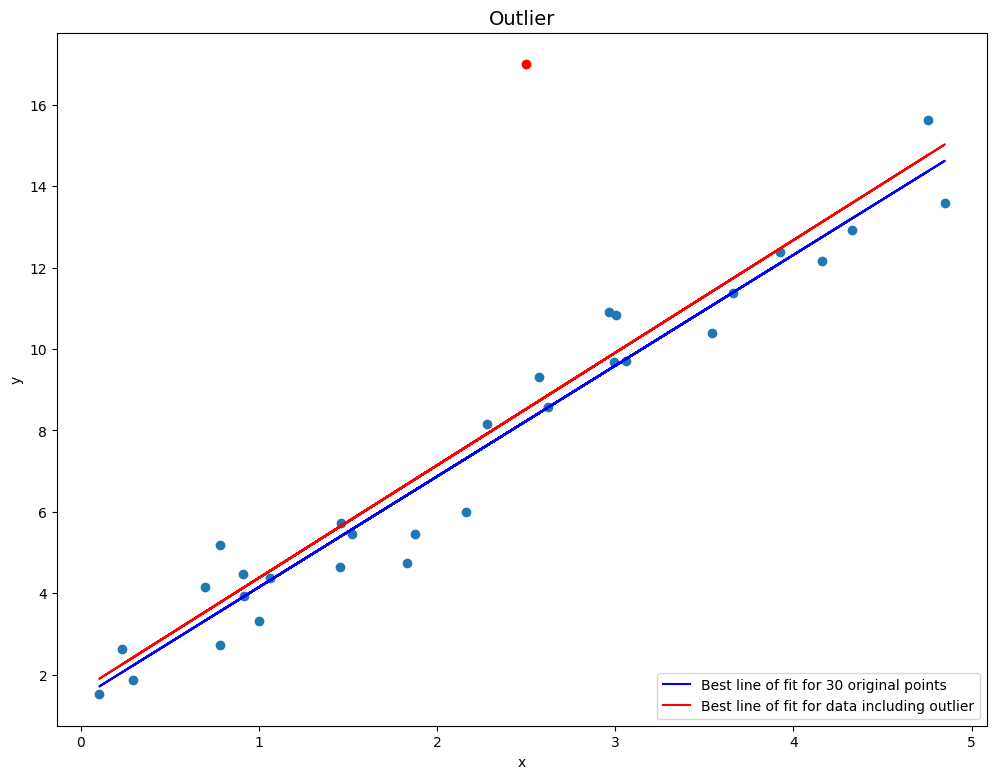

In [13]:
# Plot best line of fit for 30 original points only (in black) and for 30+outlier (in red)
plt.title("Outlier", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(2.5, 17, "ro")  # Outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ao, bo) = np.polyfit(x_with_out, y_with_out, 1)
plt.plot(
    x_with_out,
    ao * x_with_out + bo,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

**Figure 5: The Impact of a Non-Influential Leverage Point on the Regression Model Result**


In [14]:
# Add non-influential leverage point at (8, 25)
x_with_lev = np.append(x, 8)
y_with_lev = np.append(y, 25)

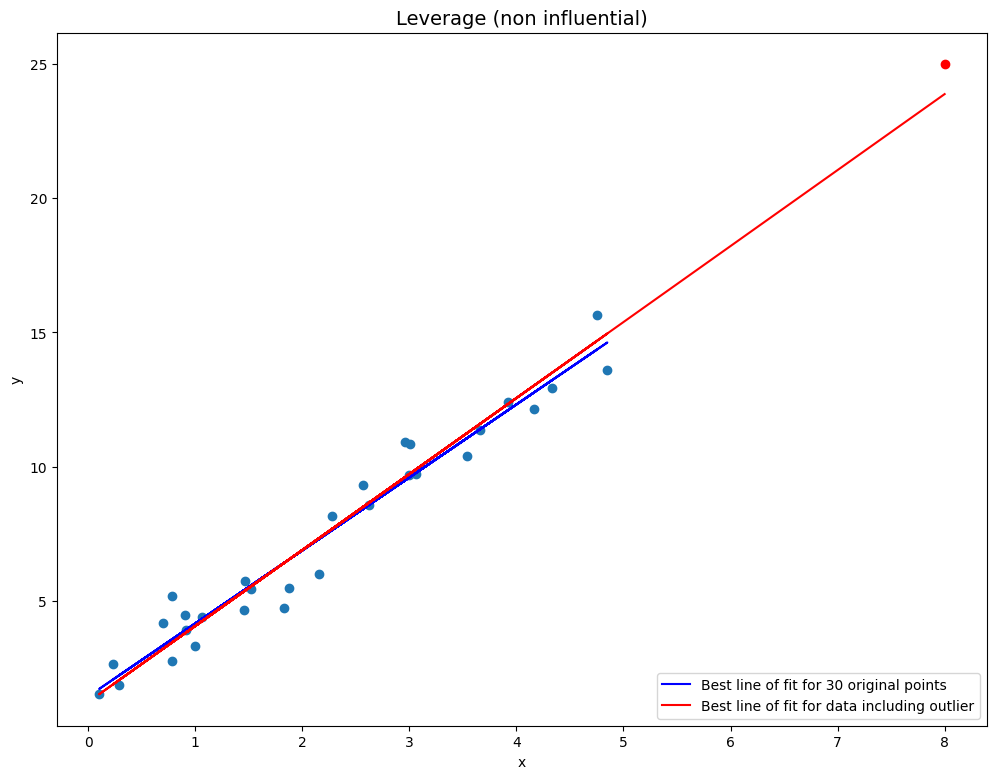

In [15]:
# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (non influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 25, "ro")  # non-influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(al, bl) = np.polyfit(x_with_lev, y_with_lev, 1)
plt.plot(
    x_with_lev,
    al * x_with_lev + bl,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

**Figure 6: The Impact of an Influential Leverage Point on the Regression Model Result**


In [16]:
# Add non-influential leverage point at (8, 25)
x_with_inf = np.append(x, 8)
y_with_inf = np.append(y, 5)

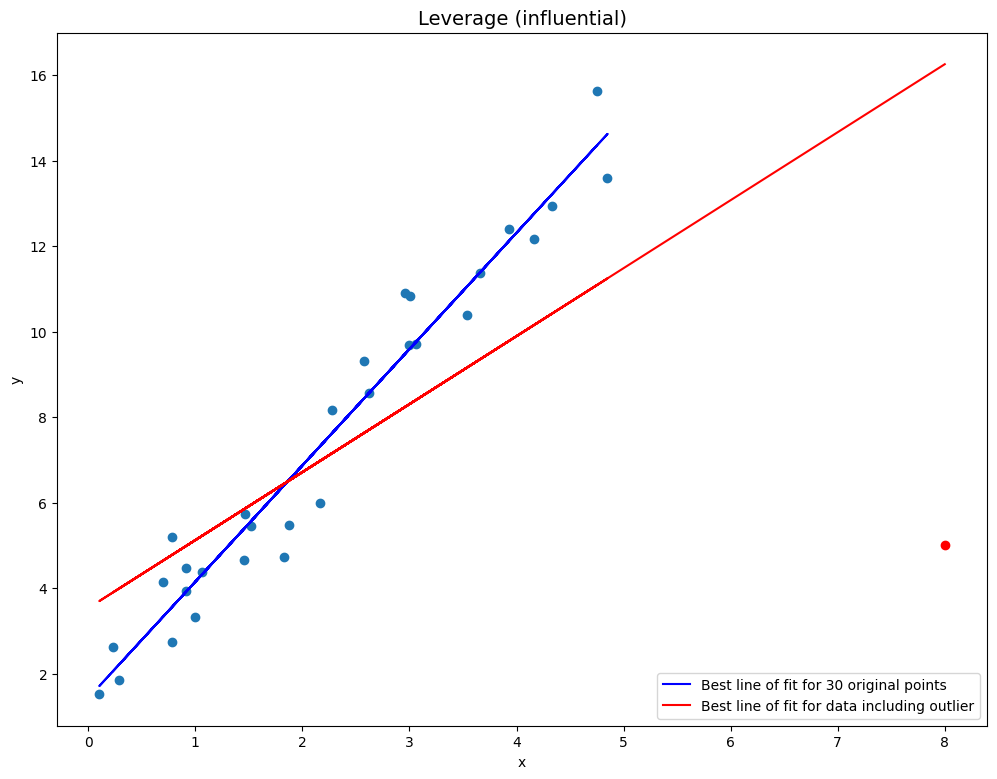

In [17]:
# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 5, "ro")  # influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ai, bi) = np.polyfit(x_with_inf, y_with_inf, 1)
plt.plot(
    x_with_inf,
    ai * x_with_inf + bi,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

Figures 4 and 5 show that the regression line remains almost unchanged whether the extreme point is included or not. In contrast, Figure 6 shows a case where the extreme point dramatically shifts the regression line. A point that meaningfully changes the regression result like this is called an **influential point**.

Identifying influential points is important because they can distort the model’s estimates. Once identified, these points should be examined to understand why they are extreme—whether due to a genuine event or a data error. After that, I typically estimate two versions of the model: one that includes the influential point and one that excludes it. Comparing the two outputs helps determine which version better aligns with the goals of the analysis.

To detect influential points, I use **Cook’s distance (Cook’s D)**. Cook’s D measures how much the predicted values change when a specific data point is removed from the model. Higher values indicate greater influence. A common rule of thumb is that any data point with a Cook’s D value greater than 1 should be treated as influential.


**Figure 7: Influence Plot for KO's Excess Return Dataset**


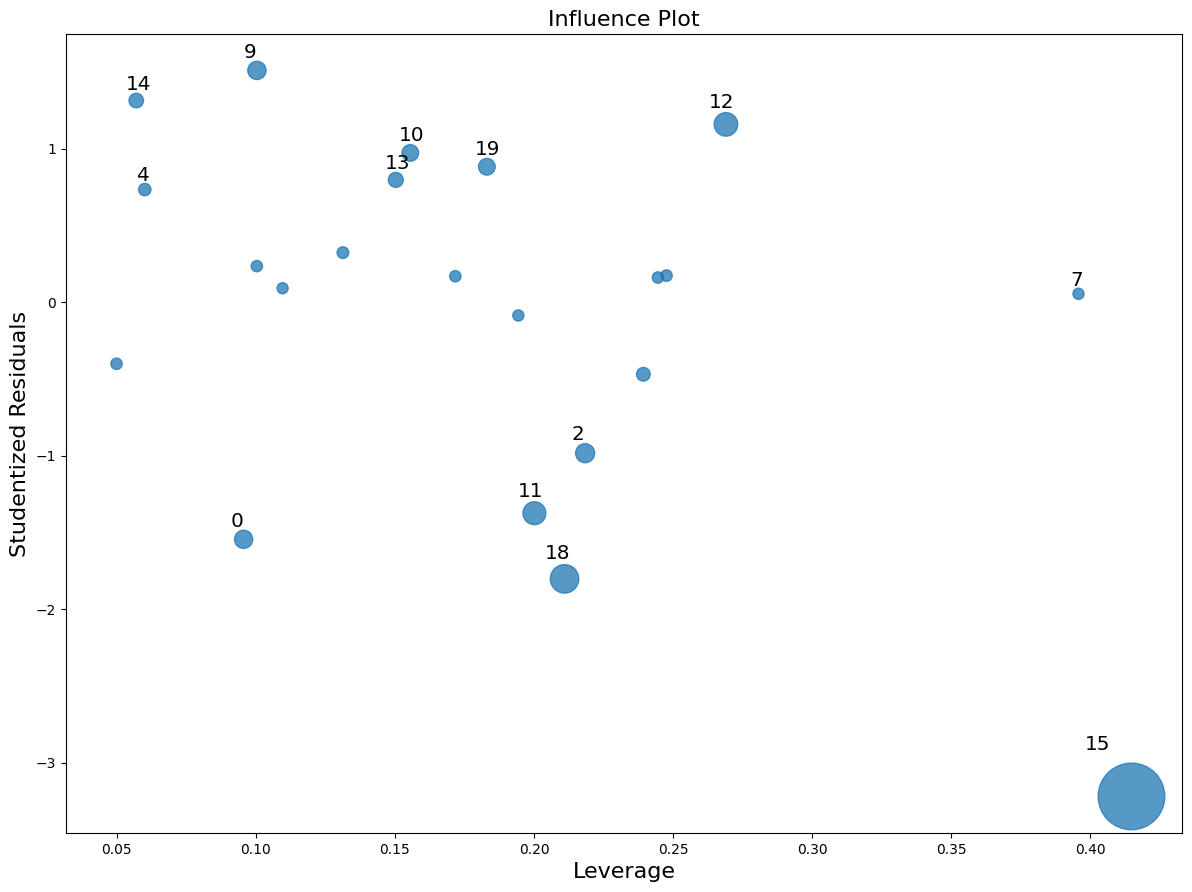

In [18]:
# Influence plot
fig = sm.graphics.influence_plot(result, criterion="cooks", alpha=0.5)
fig.tight_layout(pad=1.0)

In [19]:
# Finding most influential points
influence = result.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(30)

,dfb_Intercept,dfb_Dow_Q_EX_R,dfb_Pepsi_Q_EX_R,dfb_REV_Q_R,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15,-1.889683,2.264630,-0.430822,0.727270,1.208639,-2.611742,0.414779,-2.198763,-3.220750,-2.711472
18,-0.124451,-0.824470,0.459042,-0.147797,0.193197,-1.699993,0.210985,-0.879084,-1.803180,-0.932443
12,0.291357,0.075669,-0.235436,0.625953,0.121111,1.147373,0.269001,0.696022,1.158204,0.702592
11,-0.148011,0.132958,-0.454322,-0.227980,0.112746,-1.342453,0.200156,-0.671553,-1.375293,-0.687981
2,-0.159230,-0.367882,0.329489,0.120792,0.067781,-0.985067,0.218387,-0.520695,-0.984210,-0.520242
9,0.443542,-0.212676,-0.033271,-0.237637,0.059381,1.458782,0.100410,0.487366,1.509731,0.504388
0,-0.255128,0.021979,-0.109979,-0.299454,0.058620,-1.489205,0.095619,-0.484230,-1.545590,-0.502564
19,0.043818,0.341470,-0.123705,0.131239,0.044112,0.887378,0.183060,0.420059,0.881882,0.417457
10,0.279508,-0.201537,0.101374,-0.316001,0.043645,0.973571,0.155539,0.417827,0.972081,0.417188
13,0.179775,-0.221049,0.250137,-0.160919,0.028646,0.804747,0.150331,0.338500,0.796534,0.335045


Figure 7 presents an **influence plot**, which visualizes Cook’s D across all observations in the dataset. The horizontal axis shows the hat values, which measure how far a point’s exogenous variable values deviate from the average exogenous values. The vertical axis shows the studentized residuals, which are standardized versions of the residuals from the regression model.

Each bubble in the plot represents a data point, and the size of the bubble corresponds to its Cook’s D value—the larger the bubble, the greater the point’s influence on the regression estimates.

From this plot, it is clear that Point 15 and Point 18 have the largest Cook’s D values. Point 15, with a Cook’s D of 1.21, exceeds the common threshold of 1 and is therefore classified as an influential point in the dataset.


## **7. Conclusion**

In this lesson, I covered several key concepts that form the foundation of regression analysis. I started by distinguishing between endogenous and exogenous variables—an endogenous variable is determined within the model, while an exogenous variable comes from outside the model and serves as an input. 

I then walked through how scatter plots help diagnose relationships between variables, including checking for linearity, detecting independence, and identifying extreme observations. Using the OLS method, I estimated a regression model for KO’s excess stock return and examined each coefficient’s significance using p-values. To evaluate the model as a whole, I used both $R^2$ and adjusted $R^2$, which helped assess how well the exogenous variables explained variation in KO’s excess return.

I also introduced the concepts of outliers, leverage points, and influential points, and demonstrated how Cook’s distance and influence plots can be used to identify observations that meaningfully affect the regression results.

Along the way, I briefly touched on topics such as variable transformations and the impact of correlation among exogenous variables. These issues will be explored in more detail in the lessons that follow.
